<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Midterms/HOA5.3/PISALBON_Hands_on_Activity_5_3_Bagging%2C_Boosting_and_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Activity 5.3 Bagging, Boosting and Stacking

Dataset: Diabetes Dataset

In [ ]:
# mounting my drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
#loading the dataset
file_path = '/content/drive/MyDrive/DATASETS/diabetes.csv'
dia_df = pd.read_csv(file_path)
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
def removal_of_outliers(df, column, threshold, up):
    if up == 1:
        removed_outliers = df[df[column] <= threshold]
    else:
        removed_outliers = df[df[column] >= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title('Box Plot of ' + column)
    return removed_outliers

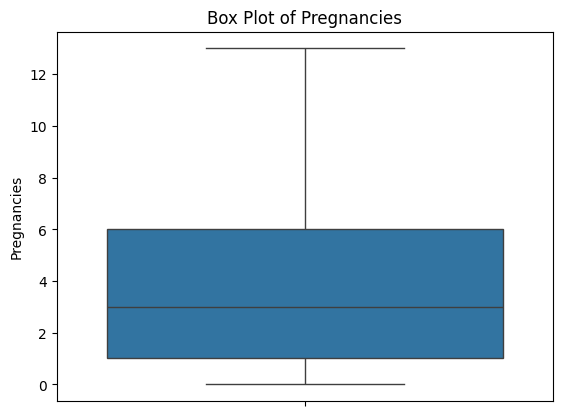

In [ ]:
# checking for outliers
dia_df = removal_of_outliers(dia_df, 'Pregnancies', 13,1)

<Axes: ylabel='Pregnancies'>

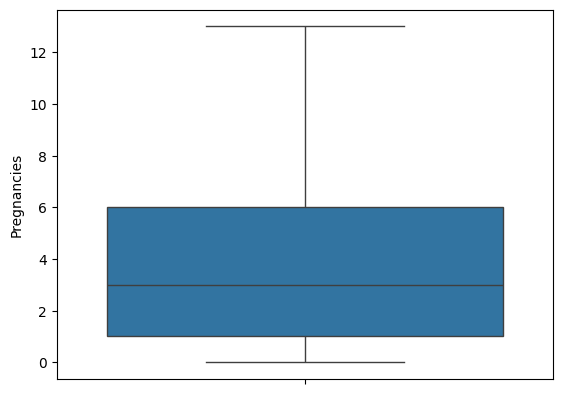

In [ ]:
# checking
sns.boxplot(dia_df['Pregnancies'])

Text(0.5, 1.0, 'Original Box Plot of Glucose')

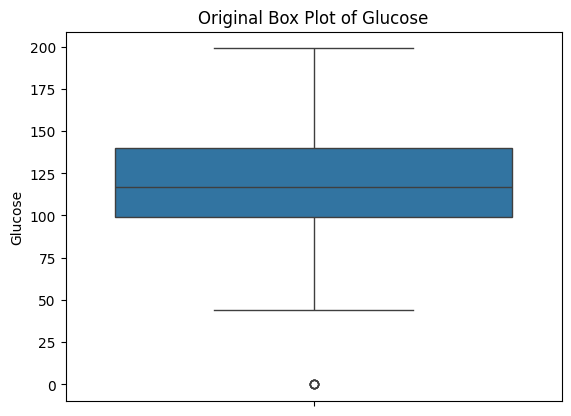

In [ ]:
sns.boxplot(dia_df['Glucose'])
plt.title('Original Box Plot of Glucose')

In [ ]:
# getting the next min value of the column on glucose
dia_df['Glucose'].sort_values(ascending=True).unique()

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199])

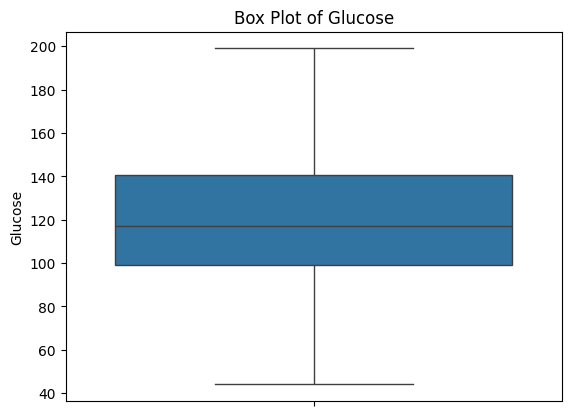

In [ ]:
dia_df = removal_of_outliers(dia_df, 'Glucose', 44,0)

Text(0.5, 1.0, 'Original Box Plot of BloodPressure')

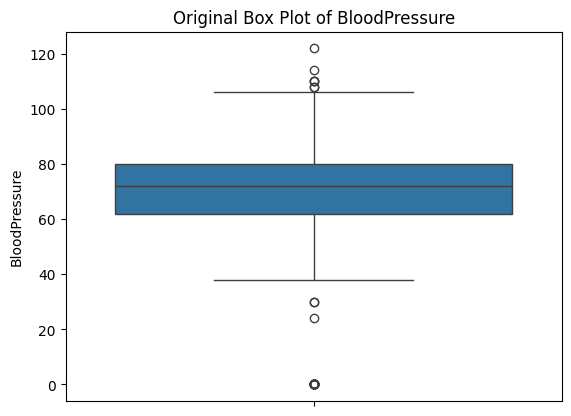

In [ ]:
sns.boxplot(dia_df['BloodPressure'])
plt.title('Original Box Plot of BloodPressure')

In [ ]:
dia_df['BloodPressure'].sort_values(ascending=True).unique()

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122])

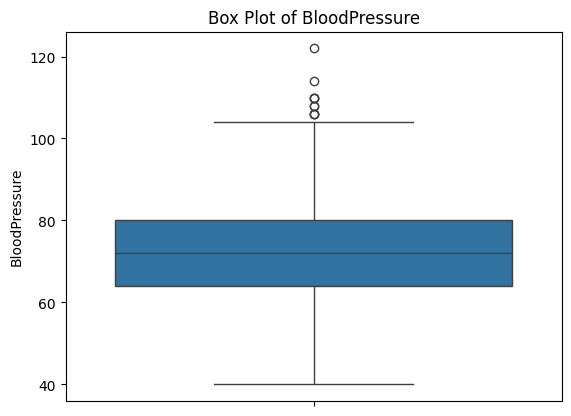

In [ ]:
dia_df = removal_of_outliers(dia_df, 'BloodPressure', 40,0)

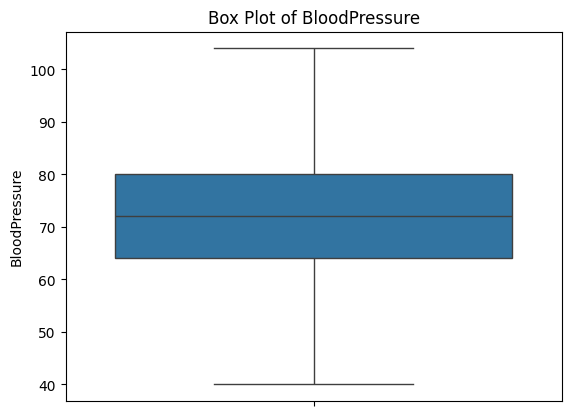

In [ ]:
dia_df = removal_of_outliers(dia_df, 'BloodPressure', 104,1)

Text(0.5, 1.0, 'Original Box Plot of SkinThickness')

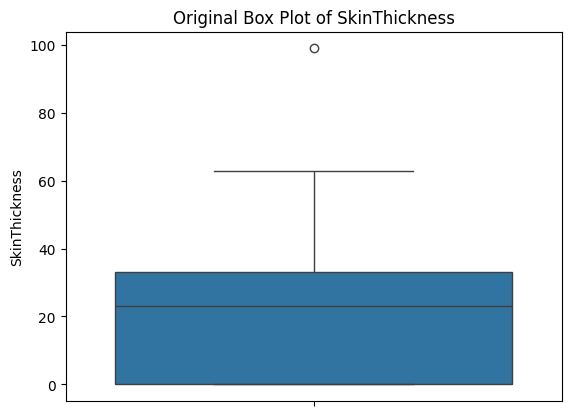

In [ ]:
sns.boxplot(dia_df['SkinThickness'])
plt.title('Original Box Plot of SkinThickness')

In [ ]:
dia_df['SkinThickness'].sort_values(ascending=True).unique()

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

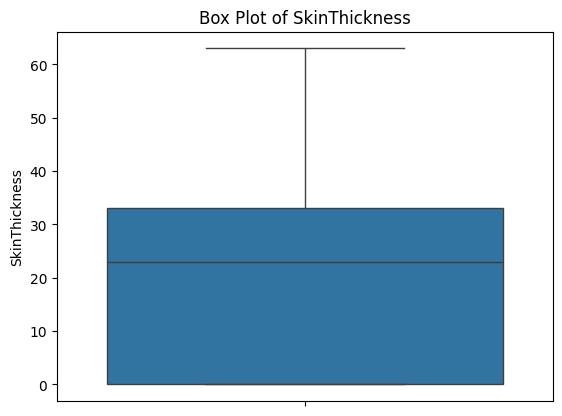

In [ ]:
dia_df = removal_of_outliers(dia_df, 'SkinThickness', 63,1)

Text(0.5, 1.0, 'Original Box Plot of Insulin')

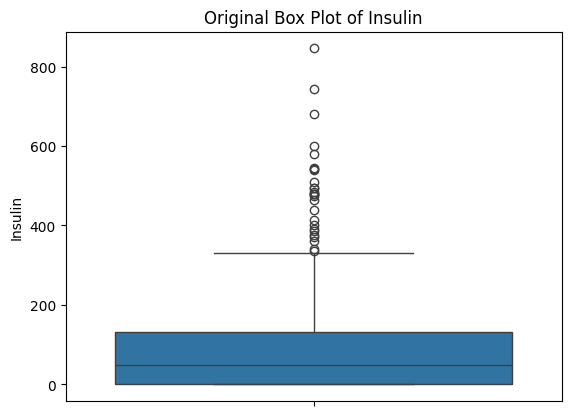

In [ ]:
sns.boxplot(dia_df['Insulin'])
plt.title('Original Box Plot of Insulin')

In [ ]:
dia_df['Insulin'].sort_values(ascending=True).unique()

array([  0,  14,  15,  16,  18,  22,  23,  29,  32,  36,  37,  38,  40,
        41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  99,
       100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122, 125,
       126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146, 148,
       150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170, 171,
       175, 176, 178, 180, 182, 183, 185, 188, 190, 191, 192, 193, 194,
       196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230, 231, 235,
       237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272, 274, 275,
       277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318, 321, 325,
       326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440,
       465, 474, 478, 480, 485, 495, 510, 540, 543, 545, 579, 60

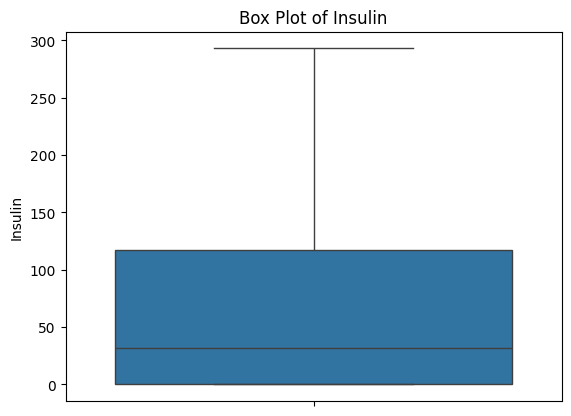

In [ ]:
dia_df = removal_of_outliers(dia_df, 'Insulin', 293,1)

Text(0.5, 1.0, 'Original Box Plot of BMI')

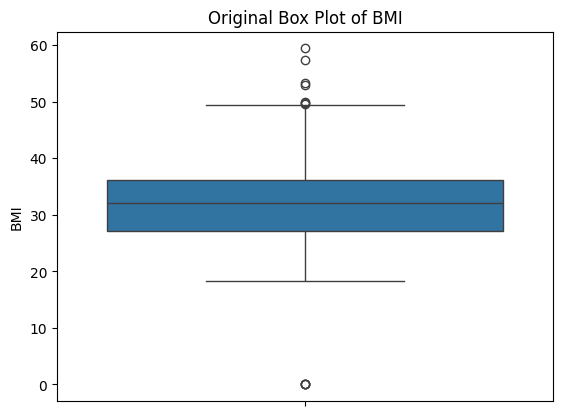

In [ ]:
sns.boxplot(dia_df['BMI'])
plt.title('Original Box Plot of BMI')

In [ ]:
dia_df['BMI'].sort_values(ascending=True).unique()

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7,
       24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9,
       26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. ,
       27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1,
       28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2, 29.3,
       29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5,
       30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3,
       33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4, 34.5,
       34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6,
       35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36

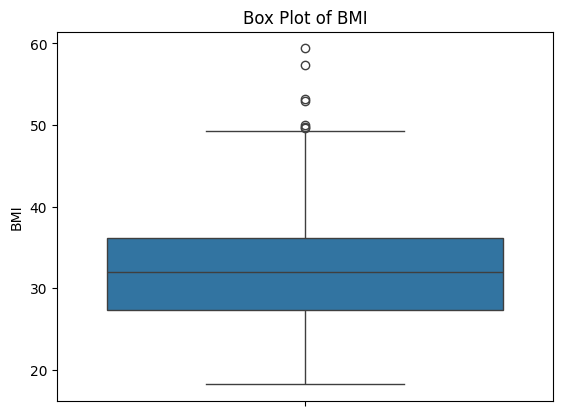

In [ ]:
dia_df = removal_of_outliers(dia_df, 'BMI', 18.2,0)

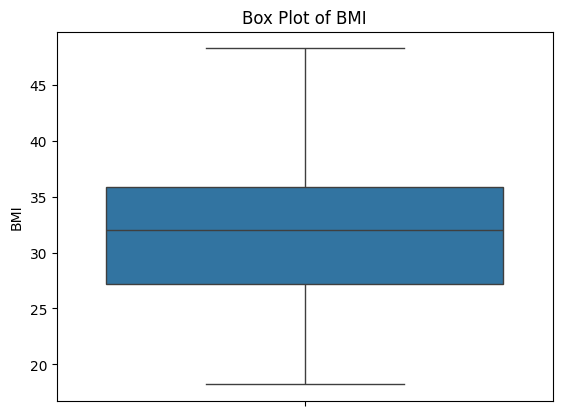

In [ ]:
dia_df = removal_of_outliers(dia_df, 'BMI', 48.3,1)

Text(0.5, 1.0, 'Original Box Plot of DiabetesPedigreeFunction')

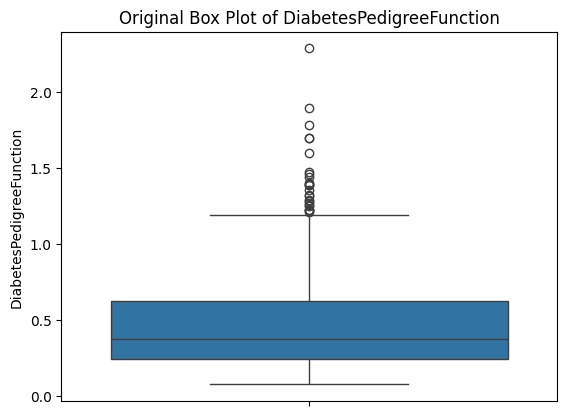

In [ ]:
sns.boxplot(dia_df['DiabetesPedigreeFunction'])
plt.title('Original Box Plot of DiabetesPedigreeFunction')

In [ ]:
dia_df['DiabetesPedigreeFunction'].sort_values(ascending=True).unique()

array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
       0.107, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126, 0.127, 0.128,
       0.129, 0.13 , 0.133, 0.135, 0.136, 0.137, 0.138, 0.14 , 0.141,
       0.142, 0.143, 0.144, 0.145, 0.147, 0.148, 0.149, 0.15 , 0.151,
       0.153, 0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161,
       0.162, 0.163, 0.164, 0.165, 0.166, 0.167, 0.17 , 0.171, 0.173,
       0.175, 0.177, 0.178, 0.179, 0.18 , 0.181, 0.182, 0.186, 0.187,
       0.188, 0.189, 0.19 , 0.191, 0.192, 0.194, 0.196, 0.197, 0.198,
       0.199, 0.2  , 0.201, 0.203, 0.204, 0.205, 0.206, 0.207, 0.21 ,
       0.215, 0.217, 0.218, 0.219, 0.22 , 0.221, 0.223, 0.225, 0.226,
       0.229, 0.23 , 0.231, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238,
       0.239, 0.241, 0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249,
       0.251, 0.252, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 ,
       0.261, 0.262, 0.263, 0.264, 0.265, 0.267, 0.268, 0.269, 0.27 ,
       0.271, 0.272,

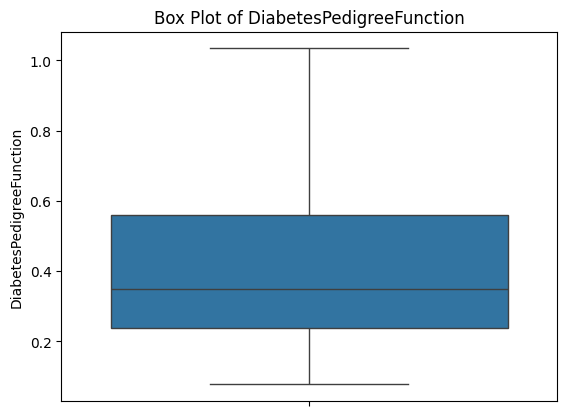

In [ ]:
dia_df = removal_of_outliers(dia_df, 'DiabetesPedigreeFunction',1.034,1)

Text(0.5, 1.0, 'Original Box Plot of Age')

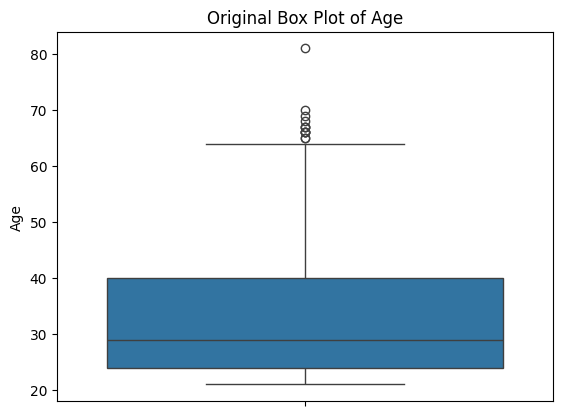

In [ ]:
sns.boxplot(dia_df['Age'])
plt.title('Original Box Plot of Age')

In [ ]:
dia_df['Age'].sort_values(ascending=True).unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 81])

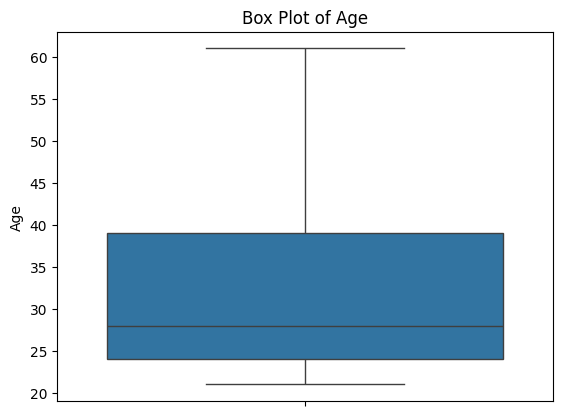

In [ ]:
dia_df = removal_of_outliers(dia_df, 'Age', 61,1)

In [ ]:
# getting info on the dataset
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               597 non-null    int64  
 1   Glucose                   597 non-null    int64  
 2   BloodPressure             597 non-null    int64  
 3   SkinThickness             597 non-null    int64  
 4   Insulin                   597 non-null    int64  
 5   BMI                       597 non-null    float64
 6   DiabetesPedigreeFunction  597 non-null    float64
 7   Age                       597 non-null    int64  
 8   Outcome                   597 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.6 KB


In [ ]:
# making a scaled dataset
scaler = StandardScaler()
scaler.fit(dia_df.drop('Outcome', axis=1))
scaled_features = scaler.transform(dia_df.drop('Outcome', axis=1))
dia_df_scaled = pd.DataFrame(scaled_features, columns=dia_df.columns[:-1])
dia_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.705808,1.051029,0.030390,0.957471,-0.845516,0.282942,0.946242,1.809230
1,-0.852504,-1.145951,-0.516628,0.561299,-0.845516,-0.831282,-0.273067,-0.076819
2,1.329133,2.271574,-0.698967,-1.353533,-0.845516,-1.356560,1.145043,0.022447
3,-0.852504,-1.006460,-0.516628,0.165127,0.374464,-0.592520,-1.085939,-1.069476
4,0.394146,-0.064897,0.212729,-1.353533,-0.845516,-0.990457,-0.935734,-0.176084


In [ ]:
# making a split of the training and testing on the scaled dataset
X_scaled = dia_df_scaled
y_scaled = dia_df['Outcome']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=42)

In [ ]:
#splitting the data into training and testign
X = dia_df.drop('Outcome', axis=1)
y = dia_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Bagging

In [ ]:
# making a grid search model
#making a param grid for SVC
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
gridSVC = GridSearchCV(estimator=SVC(), param_grid = param_grid, refit = True, verbose = 3)
gridSVC.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# making a model
bag_diab = BaggingClassifier(
    estimator=SVC(C=10, gamma=0.001, kernel='rbf'),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_diab.fit(X_train_scaled, y_train_scaled)

BaggingClassifier(estimator=SVC(C=10, gamma=0.001), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [ ]:
# testing by predicting the testing dataset
y_pred_test = bag_diab.predict(X_test_scaled)

In [ ]:
# testing by predicting the training dataset
y_pred_train = bag_diab.predict(X_train_scaled)

In [ ]:
# printing their accuracy score
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.7877094972067039
Testing Accuracy: 0.8666666666666667


In [ ]:
# printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
[[39  2]
 [ 6 13]]


In [ ]:
# printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



In [ ]:
# getting the roc-auc score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_test))

ROC-AUC Score: 0.8177150192554556


Text(0.5, 1.0, 'ROC-AUC Score of the Bagging Model')

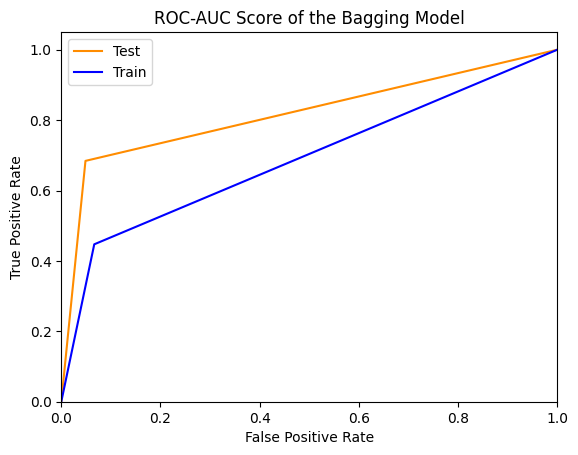

In [ ]:
# plotting the roc-auc score
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange')
plt.plot(fpr_train, tpr_train, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(['Test', 'Train'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Score of the Bagging Model')

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bag_diab, X_train_scaled, y_train_scaled, cv=10,verbose=3)
print("Cross-validation scores:", scores)

[CV] END ................................ score: (test=0.704) total time=   0.9s
[CV] END ................................ score: (test=0.852) total time=   1.0s
[CV] END ................................ score: (test=0.778) total time=   1.0s
[CV] END ................................ score: (test=0.704) total time=   1.1s
[CV] END ................................ score: (test=0.778) total time=   0.7s
[CV] END ................................ score: (test=0.778) total time=   0.6s
[CV] END ................................ score: (test=0.870) total time=   0.6s
[CV] END ................................ score: (test=0.736) total time=   0.6s
[CV] END ................................ score: (test=0.792) total time=   0.6s
[CV] END ................................ score: (test=0.849) total time=   0.6s
Cross-validation scores: [0.7037037  0.85185185 0.77777778 0.7037037  0.77777778 0.77777778
 0.87037037 0.73584906 0.79245283 0.8490566 ]


## Boosting

### Gradient Boosting

In [ ]:
# making a gridsearch model to determine the best parameters for my gradient boosting model
param_grid = {
    'n_estimators': [50, 100,150,200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, refit= True, verbose=3,cv=5)
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.759 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.713 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.748 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.748 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.776 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.796 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.704 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.766 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.785 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.841 tot

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [ ]:
grid_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
grid_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=150)

In [ ]:
# predicting the train and test
gb_pred_train = grid_gb.predict(X_train)
gb_pred_test = grid_gb.predict(X_test)

In [ ]:
# printing their accuracy score
print("Training Accuracy:", accuracy_score(y_train, gb_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, gb_pred_test))

Training Accuracy: 0.839851024208566
Testing Accuracy: 0.8166666666666667


In [ ]:
#printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred_test))

Confusion Matrix:
[[36  5]
 [ 6 13]]


In [ ]:
#printing the classification report
print("Classification Report:")
print(classification_report(y_test, gb_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



In [ ]:
#printing the roc-auc score
print("ROC-AUC Score of test:", roc_auc_score(y_test, gb_pred_test))
print("ROC-AUC Score of train:", roc_auc_score(y_train, gb_pred_train))

ROC-AUC Score of test: 0.7811296534017972
ROC-AUC Score of train: 0.7489014801110083


Text(0.5, 1.0, 'ROC-AUC Score of GradientBoosting Model')

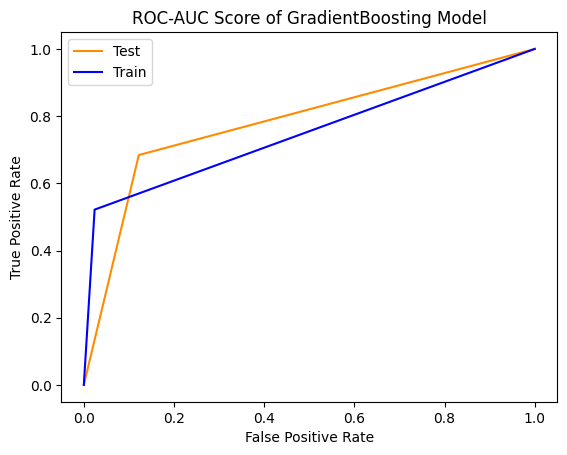

In [ ]:
#plotting the roc-auc scores
fpr_test, tpr_test, thresholds = roc_curve(y_test, gb_pred_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, gb_pred_train)
plt.plot(fpr_test, tpr_test, color='darkorange')
plt.plot(fpr_train, tpr_train, color='blue')
plt.legend(['Test', 'Train'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Score of GradientBoosting Model')

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_gb, X_train_scaled, y_train_scaled, cv=10,verbose=3)
print("Cross-validation scores:", scores)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.732 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.742 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.742 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.729 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.792 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.804 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.763 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.784 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.760 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.833 tot

### AdaBoost

In [ ]:
# making a gridsearch model to deterine the best parameters for adaboost
param_grid = {
    'n_estimators': [50, 100,150,200,250],
    'learning_rate': [0.01, 0.1],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, refit= True, verbose=3,cv=5)
grid_ada.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.722 total time=   0.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.704 total time=   0.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.766 total time=   0.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.785 total time=   0.1s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.794 total time=   0.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.778 total time=   0.3s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.704 total time=   0.2s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.757 total time=   0.2s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.701 total time=   0.2s
[CV 5/5] END algorithm=SAMME, learning_rate

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.704 total time=   0.2s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.757 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.738 total time=   0.2s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.796 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.704 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.757 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.785 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.813 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.796 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.704 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.766 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.776 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.813 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.796 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.704 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.785 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.776 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200;, score=0.813 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=250;, score=0.796 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=250;, score=0.704 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=250;, score=0.776 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=250;, score=0.776 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=250;, score=0.813 total time=   0.6s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.787 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.759 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.776 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.794 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.832 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.769 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.731 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.766 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.804 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100;, score=0.822 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150;, score=0.769 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150;, score=0.741 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150;, score=0.776 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150;, score=0.794 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150;, score=0.813 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200;, score=0.769 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200;, score=0.750 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200;, score=0.776 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200;, score=0.794 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200;, score=0.813 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=250;, score=0.769 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=250;, score=0.759 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=250;, score=0.766 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=250;, score=0.794 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=250;, score=0.813 total time=   0.6s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [ ]:
grid_ada.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 150}

In [ ]:
grid_ada.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=150)

In [ ]:
#predicting the testing and training datasets using adaboost
ada_pred_train = grid_ada.predict(X_train)
ada_pred_test = grid_ada.predict(X_test)

In [ ]:
# printing their accuracy
print("Training Accuracy:", accuracy_score(y_train, ada_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, ada_pred_test))

Training Accuracy: 0.8100558659217877
Testing Accuracy: 0.8333333333333334


In [ ]:
# printing the classification report
print("Classification Report:")
print(classification_report(y_test, ada_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
# printing the roc-auc scores of testing and training
print("ROC-AUC Score of test:", roc_auc_score(y_test, ada_pred_test))
print("ROC-AUC Score of train:", roc_auc_score(y_train, ada_pred_train))

ROC-AUC Score of test: 0.7933247753530167
ROC-AUC Score of train: 0.716970067397912


Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix of Diabetes using AdaBoost')

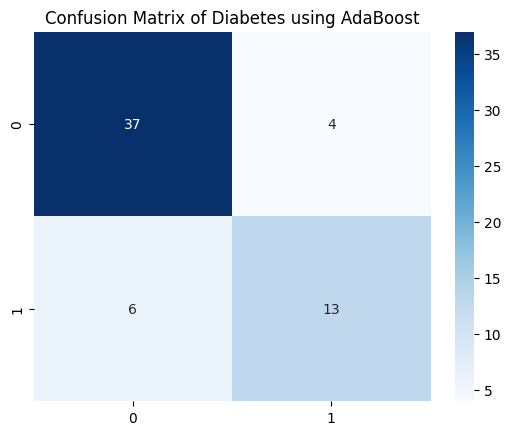

In [ ]:
# printing the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, ada_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Diabetes using AdaBoost')

Text(0.5, 1.0, 'ROC-AUC Score of AdaBoost Model')

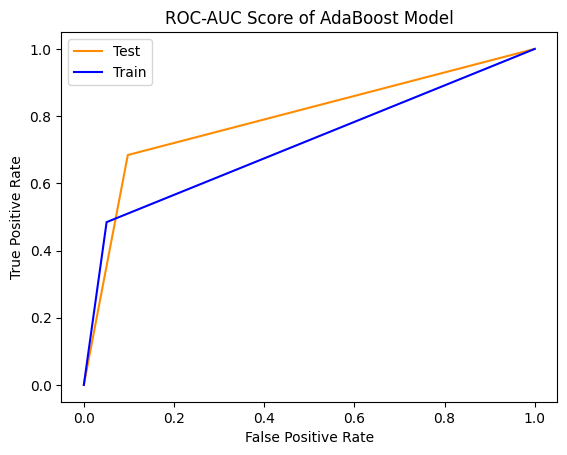

In [ ]:
# plotting the roc_auc scores
fpr_test, tpr_test, thresholds = roc_curve(y_test, ada_pred_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, ada_pred_train)
plt.plot(fpr_test, tpr_test, color='darkorange')
plt.plot(fpr_train, tpr_train, color='blue')
plt.legend(['Test', 'Train'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Score of AdaBoost Model')

### XGBoost

In [ ]:
# making a grid search mdoel for to determine the best params for the xgboost model
param_grid = {
    'n_estimators': [50, 100,150,200,250],
    'learning_rate': [0.01, 0.1,0.2,0.3],
    'max_depth': [3, 4,5,6]
}
grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, refit= True, verbose=3,cv=5)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.741 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.713 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.748 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.748 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.757 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.806 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.704 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.766 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.766 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.822 to

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=3)

In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the training and testing
xgb_pred_train = grid_xgb.predict(X_train)
xgb_pred_test = grid_xgb.predict(X_test)

In [ ]:
#printing their accuracy score
print("Training Accuracy:", accuracy_score(y_train, xgb_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, xgb_pred_test))

Training Accuracy: 0.8472998137802608
Testing Accuracy: 0.8333333333333334


In [ ]:
#printing the classification report
print("Classification Report:")
print(classification_report(y_test, xgb_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



Confusion Matrix:


Text(0.5, 1.0, 'Confusion Matrix of Diabetes using XGBoost')

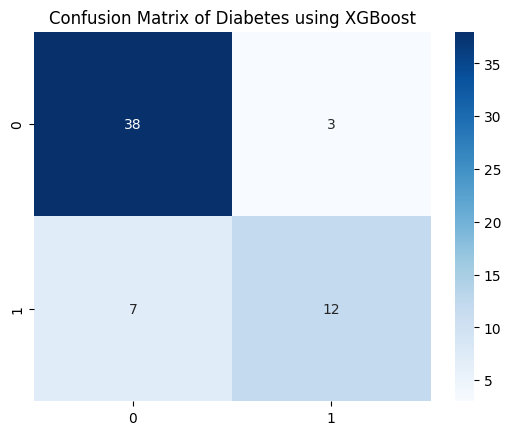

In [ ]:
# getting the confusion matrix and plotting it on heatmap
print("Confusion Matrix:")
cm = confusion_matrix(y_test, xgb_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Diabetes using XGBoost')

In [ ]:
# getting the roc-auc scores
print("ROC-AUC Score of test:", roc_auc_score(y_test, xgb_pred_test))
print("ROC-AUC Score of train:", roc_auc_score(y_train, xgb_pred_train))

ROC-AUC Score of test: 0.7792041078305519
ROC-AUC Score of train: 0.7542206290471786


Text(0.5, 1.0, 'ROC-AUC Score of XGBoost Model')

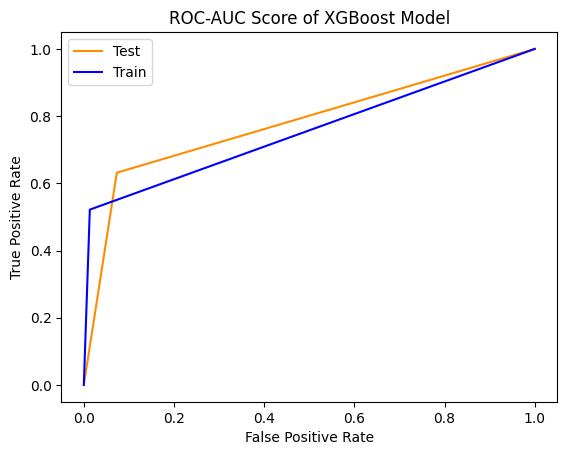

In [ ]:
# plotting the roc-auc scores
fpr_test, tpr_test, thresholds = roc_curve(y_test, xgb_pred_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, xgb_pred_train)
plt.plot(fpr_test, tpr_test, color='darkorange')
plt.plot(fpr_train, tpr_train, color='blue')
plt.legend(['Test', 'Train'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Score of XGBoost Model')

In [ ]:
# cross validation on grid xgboost model
scores = cross_val_score(grid_xgb, X_train_scaled, y_train_scaled, cv=10,verbose=0)
print("Cross-validation scores:", scores)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.732 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.722 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.740 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.740 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.753 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.773 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.708 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.802 to

## Stacking
I used KNN and SVM as estimators and I used RandomForest for my final estimator

In [ ]:
# making a grid search model
#making a param grid for SVC
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
gridSVC = GridSearchCV(estimator=SVC(), param_grid = param_grid, refit = True, verbose = 3)
gridSVC.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
gridSVC.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# making a gridsearch model to determine the best parameters for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, refit= True, verbose=3,cv=5)
grid_knn.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.713 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.657 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.701 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.729 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.757 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.694 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.657 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.692 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.729 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.748 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.713 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid_knn.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [ ]:
# making a gridsearch model to determine the best parameters for random forest
param_grid = {
    'n_estimators': [50, 100,150,200],
    'max_depth': [3,4,5],
    'min_samples_split': [2,3,4]
}
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, refit= True, verbose=3,cv=5)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.759 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.731 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.757 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.766 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.759 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.713 total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.785 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=100;, score=0.785 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=100;, scor

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [ ]:
grid_rf.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

In [ ]:
# making a stacking model by using KNN and SVM as estimators and Random Forest as final_estimator
estimators = [
    ('svc', SVC(C=10, gamma=0.001, kernel='rbf')),
    ('knn', KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'))
]
stacking_diab = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200, verbose=3)
)
stacking_diab.fit(X_train, y_train)

building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s


building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
build

[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.3s


StackingClassifier(estimators=[('svc', SVC(C=10, gamma=0.001)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=9, p=1,
                                                     weights='distance'))],
                   final_estimator=RandomForestClassifier(max_depth=5,
                                                          min_samples_split=3,
                                                          n_estimators=200,
                                                          verbose=3))

In [ ]:
# predicting the testing and training datasets
stacking_pred_train = stacking_diab.predict(X_train)
stacking_pred_test = stacking_diab.predict(X_test)

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s


In [ ]:
#printing their accuracy scores
print("Training accuracy:", accuracy_score(y_train, stacking_pred_train))
print("Testing accuracy:", accuracy_score(y_test, stacking_pred_test))

Training accuracy: 1.0
Testing accuracy: 0.8


In [ ]:
# printing the classification report
print("Classification Report:")
print(classification_report(y_test, stacking_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60



Text(0.5, 1.0, 'Confusion Matrix of Diabetes using Stacking')

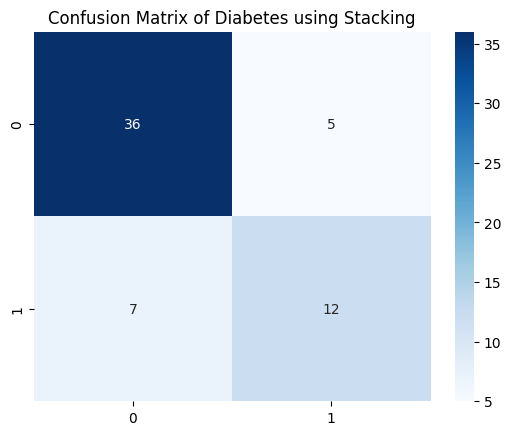

In [ ]:
#getting the confusion matrix and plottint it
cm = confusion_matrix(y_test, stacking_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Diabetes using Stacking')

In [ ]:
# getting the roc-auc scores
print("ROC-AUC Score of test:", roc_auc_score(y_test, stacking_pred_test))
print("ROC-AUC Score of train:", roc_auc_score(y_train, stacking_pred_train))

ROC-AUC Score of test: 0.7548138639281129
ROC-AUC Score of train: 1.0


Text(0.5, 1.0, 'roc-auc score of stacking model')

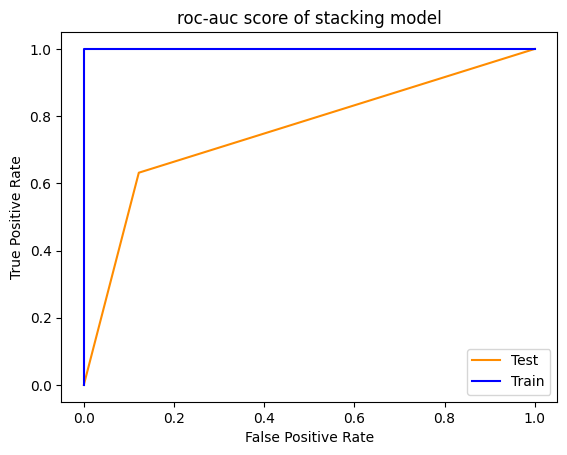

In [ ]:
# plotting the roc-auc scores
fpr_test, tpr_test, thresholds = roc_curve(y_test, stacking_pred_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train, stacking_pred_train)
plt.plot(fpr_test, tpr_test, color='darkorange')
plt.plot(fpr_train, tpr_train, color='blue')
plt.legend(['Test', 'Train'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc-auc score of stacking model')

### Evaluation of the models

In this Hands-on Activity I have a trouble in getting a high accuracy on the models because the first accuracy scores where in the range of 0.70-0.60, what I did is first I check on the outliers per column on my dataset by plotting it with the boxplot then I check the min and max values for the threshold to remove the outliers, next what I did is I increased the size of my training dataset, and the result is an increase of accuracy score but didn't meet the required score of 95%, my conclusion will be if I get more data from my dataset the models will learn more and be able to further test the models. <br> <br>

The Performance of my model in bagging underfits because the accuracy on training is lower than the accuracy of testing dataset, on the validating part the model correctly predicted the datapoints who have does not have diabetes by having a .95 recall while performed badly on datapoints who have diabetes having an accuracy score .68. <br> <br>

The Performance of my model in GradientBoosting performs just right having a slightly equal accuracy scores (but it is not ideal because our target is .95 accuracy score), The model correctly predicted the datapoints pretty as well the model correctly identified actual datapoints of those who don't have diabetes but the model didn't identified majority of the datapoints who have diabetes. <br> <br>

The Performance of my model in AdaBoost slightly underfits because the accuracy score of testing is slightly higher than the accuracy score of the training. <br> <br>

The Performance of my model in XGBoost performs just right by having a slightly equal accuracy scores on both dataset split. The Model Performed well both on the outcomes in correctly predicting the outcomes of the dataset, the model also performed well in correctly identifying the datapoints who does not have diabetes but did not performed well in identifying the datapoints who have diabetes. <br> <br>

The Performance of my model in Stacking overfits because it got a perfect score on training (higher) but has a lower accuracy score on testing dataset. The model Performed well in predicting all datapoints of those who have diabetes and identified all the datapoints who does not have diabetes, bet performed slightly lower in predicting the datapoints who have diabetes and identifying all datapoints who have diabetes. <br> <br>

To sum up the evaluation of the models used in the diabetes dataset, two of them performed just right, those models are the GradientBoosting and XGBoost but all in all the XGBoost is the best model for my dataset because it has higher accuracy score, roc-auc score, low number of misclassifications on my dataset. The things that I noticed on the models that I used is that they have low score on recall of those who have diabetes, my hypothesis would be the population of datapoints who does not have diabetes have is higher than the datapoints who does have diabetes that's why some of my models overfits and underfits.